In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

In [2]:
my_data_dir='D:\\all\\DATA\\cell_images\\cell_images'

In [3]:
os.listdir(my_data_dir)

['test', 'train']

In [4]:
test_path=my_data_dir+'\\test\\'
train_path=my_data_dir+'\\train\\'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
para_cell=train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
para_img=imread(para_cell)

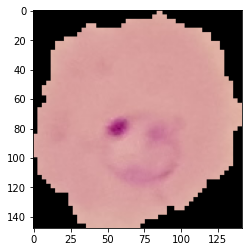

In [10]:
plt.imshow(para_img)

In [11]:
para_img.shape

(148, 142, 3)

In [12]:
uninfected_cell_path=train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]

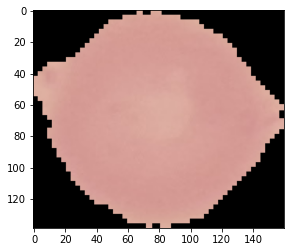

In [13]:
uninfected_cell=imread(uninfected_cell_path)
plt.imshow(uninfected_cell)

In [14]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [15]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [16]:
uninfected_cell.shape

(139, 160, 3)

In [17]:
para_img.shape

(148, 142, 3)

In [18]:
dim1=[]
dim2=[]
for img_filename in os.listdir(test_path+'\\uninfected'):
    img=imread(test_path+'\\uninfected\\'+img_filename)
    d1,d2,color=img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\GARJOLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


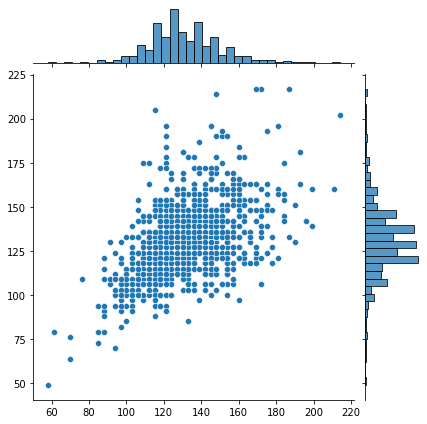

In [19]:
sns.jointplot(dim1,dim2)

In [20]:
np.mean(dim1)

130.92538461538462

In [21]:
np.mean(dim2)

130.75

In [22]:
image_shape=(130,130,3)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
img_gen=ImageDataGenerator(rotation_range=20,
                          width_shift_range=.10,
                          height_shift_range=.1,
                          rescale=1/255,shear_range=.1,
                          zoom_range=.1,
                          horizontal_flip=True,
                          fill_mode='nearest')

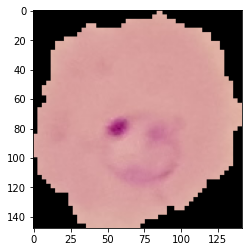

In [25]:
plt.imshow(para_img)

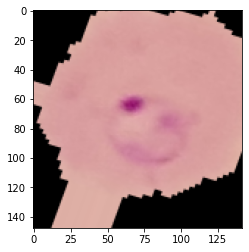

In [26]:
plt.imshow(img_gen.random_transform(para_img))

In [27]:
img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [28]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [29]:
#Creating the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Flatten,Dense,Conv2D,MaxPooling2D

In [31]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [33]:
#Early stopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [36]:
train_image_gen=img_gen.flow_from_directory(train_path,
                                            target_size=image_shape[:2],
                                            color_mode='rgb',
                                            batch_size=16,
                                            class_mode='binary')

Found 24958 images belonging to 2 classes.


In [37]:
test_image_gen=img_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',
                                          batch_size=16,class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

1560/1560 [==============================] - 1464s 939ms/step - loss: 0.6489 - accuracy: 0.6157 - val_loss: 0.4071 - val_accuracy: 0.8169


In [47]:
from tensorflow.keras.models import load_model
model.save("malaria_detector.h5")

In [48]:
nmodel=load_model('malaria_detector.h5')

In [51]:
nmodel.metrics_names

['loss', 'accuracy']

In [52]:
model.evaluate_generator(test_image_gen)

[0.41921067237854004, 0.8146153688430786]

In [53]:
from tensorflow.keras.preprocessing import image

In [54]:
pred_probabilities=model.predict_generator(test_image_gen)

In [55]:
pred_probabilities

array([[8.6514781e-11],
       [2.6353598e-03],
       [8.4176660e-04],
       ...,
       [8.3600384e-01],
       [6.8315631e-01],
       [6.5967470e-01]], dtype=float32)

In [56]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [57]:
predictions=pred_probabilities>.5

In [58]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1300
           1       0.75      0.92      0.83      1300

    accuracy                           0.81      2600
   macro avg       0.83      0.81      0.81      2600
weighted avg       0.83      0.81      0.81      2600



In [61]:
confusion_matrix(test_image_gen.classes,predictions)

array([[ 902,  398],
       [  98, 1202]], dtype=int64)

In [62]:
para_cell

'D:\\all\\DATA\\cell_images\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [63]:
my_image=image.load_img(para_cell,target_size=image_shape)

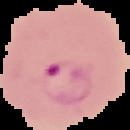

In [64]:
my_image

In [65]:
type(my_image)

PIL.Image.Image

In [66]:
my_image=image.img_to_array(my_image)

In [67]:
type(my_image)

numpy.ndarray

In [68]:
my_image.shape

(130, 130, 3)

In [69]:
my_image=np.expand_dims(my_image,axis=0)

In [70]:
my_image.shape

(1, 130, 130, 3)

In [71]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [72]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [73]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}